#  <span style="color:#cc416d"> Análisis exploratorio de datos piezométricos </span>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Ruta al CSV
ruta_csv = r"C:/Proyectos/2024/Conejos/mapas/pozos.csv"
#salida
ruta_salida = r"C:/Proyectos/2024/Conejos/mapas/"

# Leer CSV
df = pd.read_csv(ruta_csv)

In [15]:
df

,Unnamed: 0,clv,tipo,uso,regimen,x_nad27,y_nad27,z_gps,z_carta,brocal,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,CM-001,Pozo,1,1,347399,3516542,1248,1273.0,65.0,...,49.12,NaN,NaN,51.28,NaN,NaN,51.25,52.14,52.87,53.25
1,1,CM-001B,Pozo,1,1,347130,3517209,1258,1271.0,37.0,...,54.12,NaN,NaN,56.30,NaN,NaN,56.24,56.87,57.20,52.24
2,2,CM-002,Pozo,1,3,347668,3515888,1254,1274.0,NaN,...,57.57,NaN,NaN,59.35,NaN,NaN,60.24,60.87,61.21,61.28
3,3,CM-003,Pozo,2,3,342798,3490331,1283,1252.0,35.0,...,72.19,NaN,73.29,74.25,NaN,NaN,74.80,74.60,74.98,74.12
4,4,CM-006,Pozo,3,3,351797,3498719,1307,1299.0,51.0,...,132.20,133.18,133.98,134.58,NaN,NaN,134.89,134.98,135.68,136.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,CM-166,Pozo,8,1,327801,3508308,1255,1255.0,64.0,...,90.37,94.90,NaN,95.05,NaN,NaN,96.35,96.94,NaN,97.05
153,153,CM-167,Pozo,8,1,330958,3508631,1259,1259.0,73.0,...,NaN,NaN,NaN,39.97,NaN,NaN,40.14,40.16,40.87,40.90
154,154,CM-168,Pozo,8,1,330938,3504118,1257,1257.0,68.0,...,95.95,96.58,97.12,97.89,NaN,NaN,98.10,98.78,99.10,99.14
155,155,CM-169,Pozo,8,1,325540,3505987,1252,1252.0,54.0,...,89.74,89.75,90.06,91.20,NaN,NaN,92.87,93.82,93.98,94.51


In [3]:
# Columnas de años (todas las que son numéricas de 4 dígitos)
anios = [col for col in df.columns if col.isdigit()]

# 1️⃣ Total de pozos
total_pozos = len(df)

# 2️⃣ Pozos con al menos un valor en cualquier año
pozos_con_valor = df[anios].notna().any(axis=1).sum()

# 3️⃣ Pozos sin ningún valor en ningún año
pozos_sin_valor = total_pozos - pozos_con_valor


In [4]:
# 4️⃣ Resumen por año
resumen_anual = []
for anio in anios:
    con_valor = df[anio].notna().sum()
    sin_valor = total_pozos - con_valor
    resumen_anual.append({
        "Año": anio,
        "Pozos con valor": con_valor,
        "Pozos sin valor": sin_valor
    })

resumen_df = pd.DataFrame(resumen_anual)

In [5]:
# 5️⃣ Estadísticas generales de los niveles piezométricos
max_nivel = df[anios].max().max()
min_nivel = df[anios].min().min()
media_nivel = df[anios].mean().mean()

In [7]:
# 6️⃣ Conteo de NaN y con datos
total_nan = df[anios].isna().sum().sum()
total_con_dato = df[anios].notna().sum().sum()


In [8]:
# Mostrar resultados
print(f"📌 Total de pozos: {total_pozos}")
print(f"✅ Pozos con al menos un valor: {pozos_con_valor}")
print(f"⚠️ Pozos sin ningún valor: {pozos_sin_valor}\n")

print(f"📊 Máximo nivel piezométrico: {max_nivel}")
print(f"📊 Mínimo nivel piezométrico: {min_nivel}")
print(f"📊 Media nivel piezométrico: {media_nivel:.2f}\n")

print(f"📊 Total de valores con datos: {total_con_dato}")
print(f"📊 Total de valores NaN: {total_nan}\n")

print("📊 Resumen por año:")
print(resumen_df)


📌 Total de pozos: 157
✅ Pozos con al menos un valor: 157
⚠️ Pozos sin ningún valor: 0

📊 Máximo nivel piezométrico: 136.01
📊 Mínimo nivel piezométrico: 0.05
📊 Media nivel piezométrico: 50.69

📊 Total de valores con datos: 1443
📊 Total de valores NaN: 755

📊 Resumen por año:
     Año  Pozos con valor  Pozos sin valor
0   2005              134               23
1   2006              126               31
2   2007              126               31
3   2008                0              157
4   2009              117               40
5   2010              109               48
6   2011              131               26
7   2012              134               23
8   2013                0              157
9   2014                0              157
10  2015              133               24
11  2016              147               10
12  2017              138               19
13  2018              148                9


#  <span style="color:#cc416d"> Gráfica de pastel, con valores & sin valor</span>

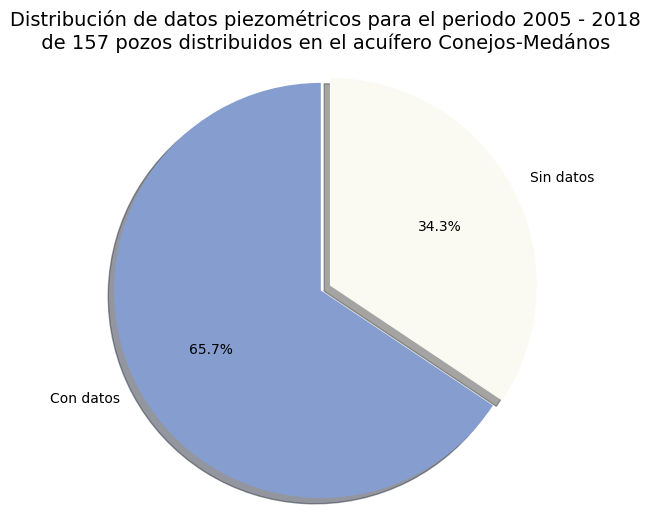

In [9]:
# Datos
valores_con_dato = 1443
valores_sin_dato = 755

# Etiquetas y valores
labels = ['Con datos', 'Sin datos']
sizes = [valores_con_dato, valores_sin_dato]
colors = ['#869ecf', '#faf9f2']  # Verde y naranja
explode = (0.05, 0)  # Separar un poco el primer sector

# Gráfica de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Mostrar porcentaje
    startangle=90,
    explode=explode,
    shadow=True
)

plt.title('Distribución de datos piezométricos para el periodo 2005 - 2018\n de 157 pozos distribuidos en el acuífero Conejos-Medános ', fontsize=14)
plt.axis('equal')  # Mantener forma de círculo
plt.show()



#  <span style="color:#cc416d"> Disponibilidad de datos </span>

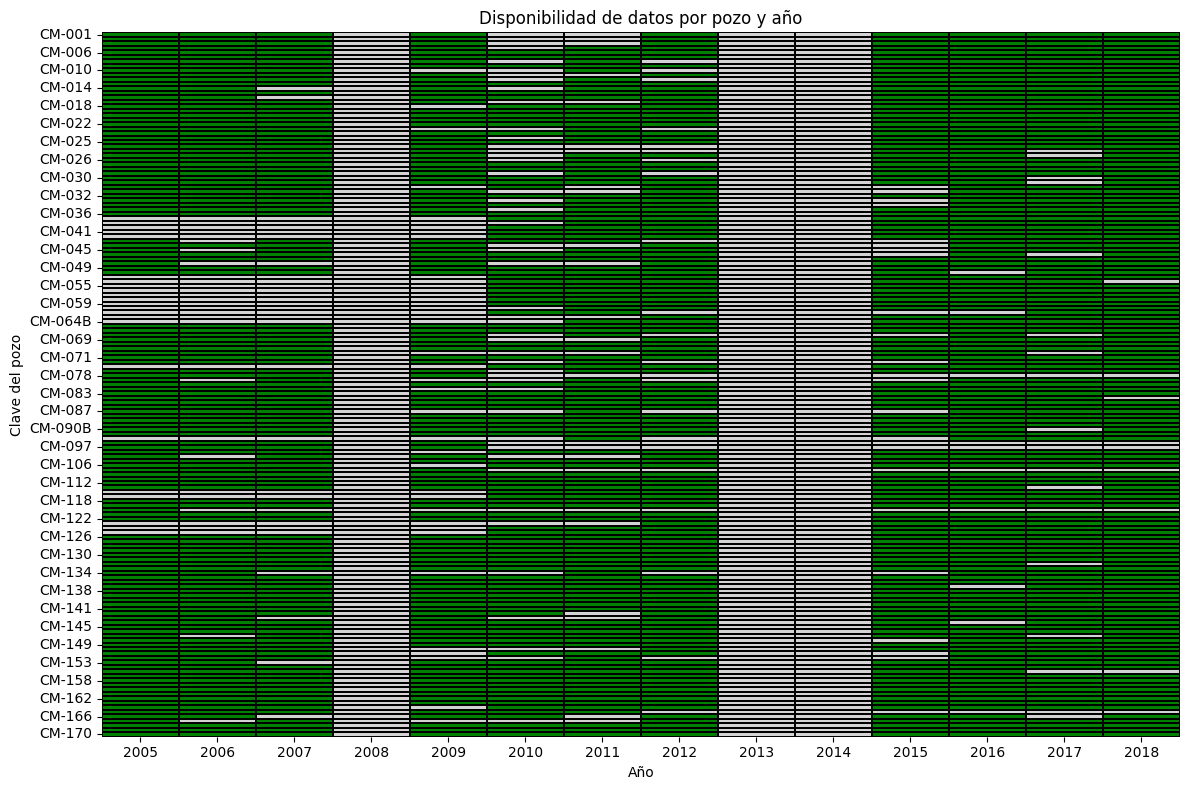

In [11]:
# Detectar columnas de años
anios = [col for col in df.columns if col.isdigit()]

# Crear una matriz binaria (1 = tiene valor, 0 = no tiene valor)
matriz = df[anios].notna().astype(int)

# Opcional: usar el ID del pozo como índice
matriz.index = df['clv']

# Crear figura
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz,
    cmap=['lightgrey', 'green'],  # Gris = sin dato, Verde = con dato
    cbar=False,
    linewidths=0.2,
    linecolor='black'
)

plt.title('Disponibilidad de datos por pozo y año')
plt.xlabel('Año')
plt.ylabel('Clave del pozo')
plt.tight_layout()
# Guardar imagen
# salida = os.path.join(ruta_salida, "datos.png")
# plt.savefig(salida, dpi=300)

plt.show()





#  <span style="color:#cc416d"> Evolución de valores por pozo con y sin huecos de menor a mayor profundidad </span>

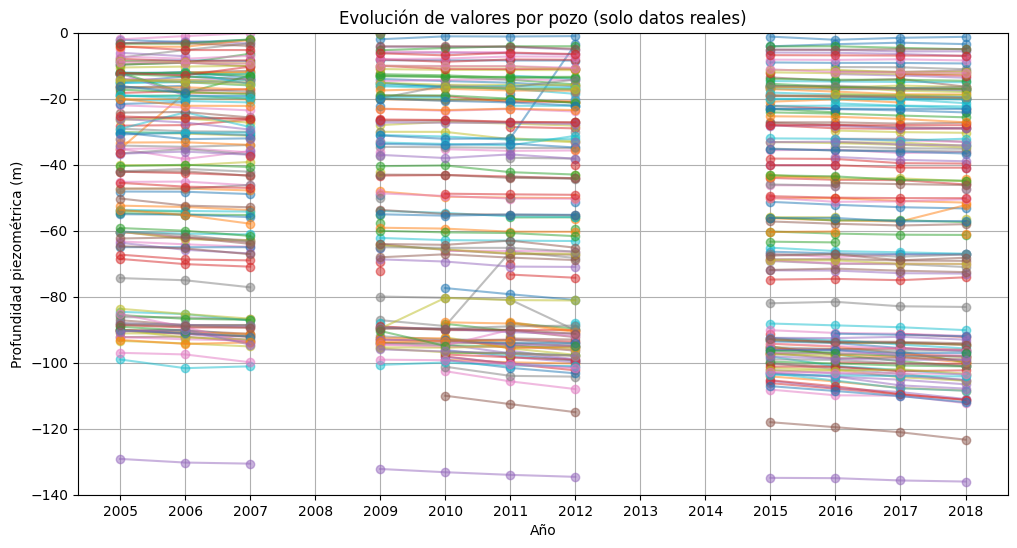

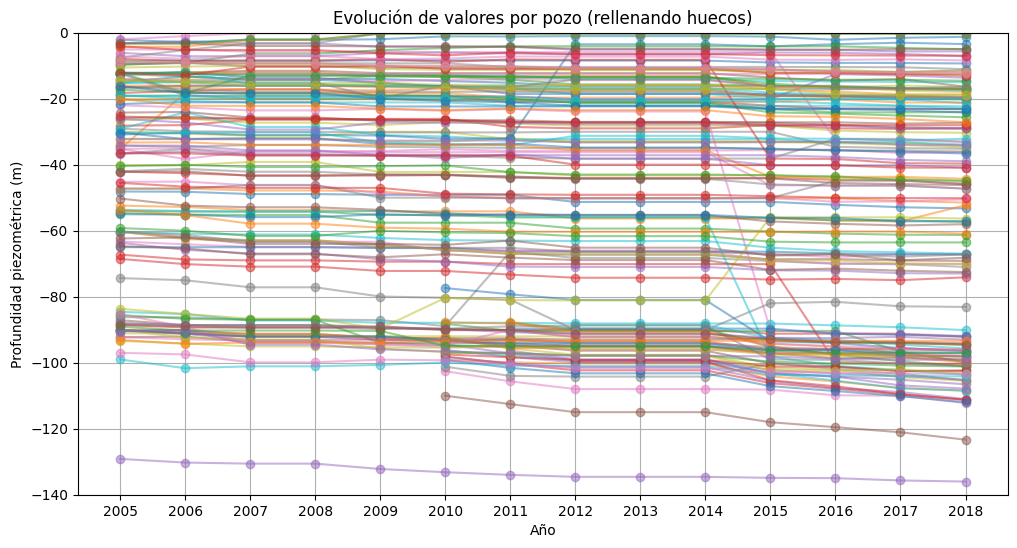

In [17]:
# Lista de años como strings
anios = [str(y) for y in range(2005, 2019)]

# Convertir valores a negativos (si son positivos)
df_neg = df.copy()
df_neg[anios] = -df_neg[anios].abs()

# --- VERSIÓN 1: solo valores reales ---
plt.figure(figsize=(12, 6))
for _, row in df_neg.iterrows():
    plt.plot(
        anios,
        row[anios],
        marker='o',
        linestyle='-',
        alpha=0.5
    )

plt.title("Evolución de valores por pozo (solo datos reales)")
plt.xlabel("Año")
plt.ylabel("Profundidad piezométrica (m)")
plt.ylim(-140, 0)  # Inicia en -140 y sube hasta 0
plt.grid(True)
salida = os.path.join(ruta_salida, "hist_piezometria_datReales.png")
plt.savefig(salida, dpi=300)
plt.show()


# --- VERSIÓN 2: con relleno de huecos (forward fill) ---
df_ffill = df_neg.copy()
df_ffill[anios] = df_ffill[anios].ffill(axis=1)  # Rellenar hacia adelante por fila

plt.figure(figsize=(12, 6))
for _, row in df_ffill.iterrows():
    plt.plot(
        anios,
        row[anios],
        marker='o',
        linestyle='-',
        alpha=0.5
    )

plt.title("Evolución de valores por pozo (rellenando huecos)")
plt.xlabel("Año")
plt.ylabel("Profundidad piezométrica (m)")
plt.ylim(-140, 0)  # Igual que el primer gráfico
plt.grid(True)
# salida = os.path.join(ruta_salida, "hist_piezometria_relleno.png")
# plt.savefig(salida, dpi=300)
plt.show()


#  <span style="color:#cc416d"> Pozos con cambios > 5 m entre años consecutivos </span>


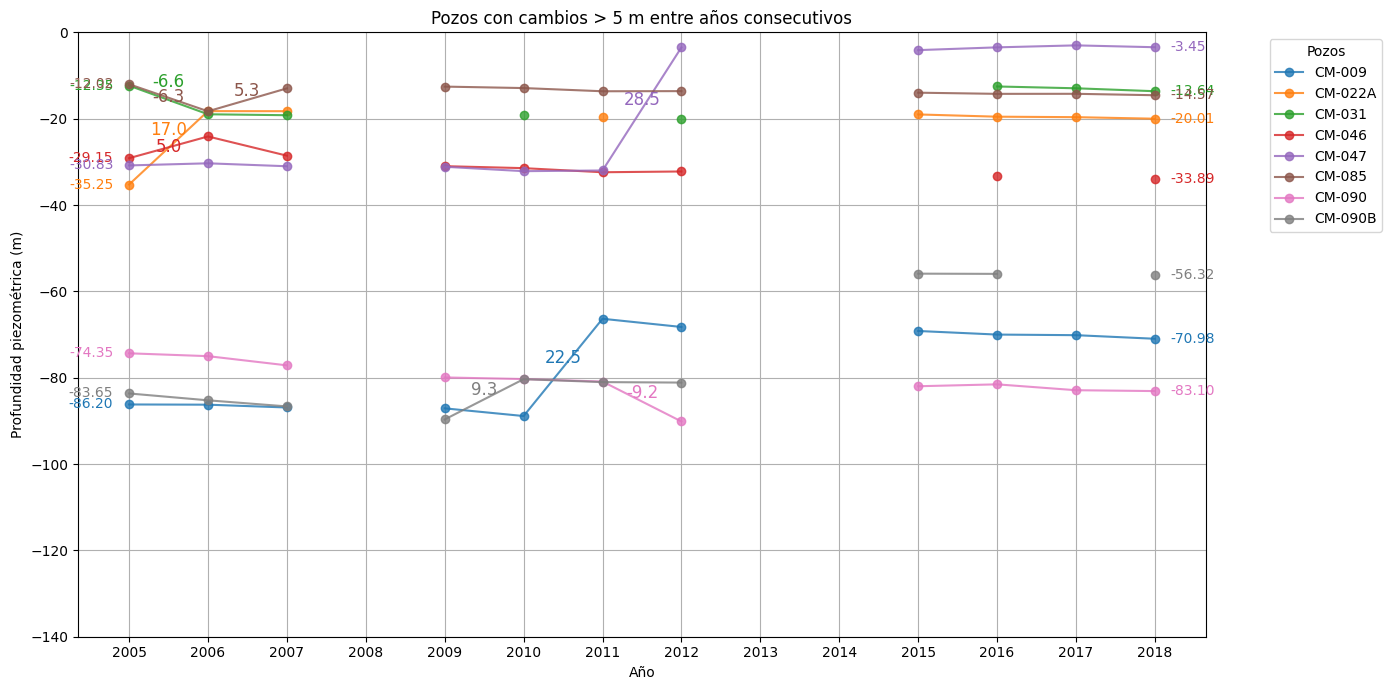

In [19]:
# Lista de años como strings
anios = [str(y) for y in range(2005, 2019)]

# 1) Convertir valores a NEGATIVOS (profundidades)
df_neg = df.copy()
df_neg[anios] = -df_neg[anios].abs()

# 2) Diferencias entre años consecutivos (sobre profundidades negativas)
df_diff = df_neg[anios].diff(axis=1)

# 3) Filtrar pozos con |cambio| > 5 m
pozos_cambio_grande = df_neg[df_diff.abs().gt(5).any(axis=1)]

# 4) Empalmes / ajustes manuales para colocar etiquetas de cambio
desplazamientos = {
    ("CM-022A", "2005", "2006"):  2,   # mover +2 m en Y (hacia valores menos negativos)
    ("CM-046",  "2005", "2006"): -2,   # mover -2 m en Y (hacia valores más negativos)
    ("CM-031",  "2005", "2006"):  2,
    ("CM-085",  "2005", "2006"): -2
}

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# 5) Graficar cada pozo
for _, row in pozos_cambio_grande.iterrows():
    # Línea del pozo con valores NEGATIVOS
    line, = plt.plot(anios, row[anios], marker='o', linestyle='-', alpha=0.8, label=row['clv'])
    line_color = line.get_color()

    # Etiqueta valor inicial (2005)
    if pd.notna(row["2005"]):
        plt.text(
            -0.2, row["2005"], f"{row['2005']:.2f}",
            ha='right', va='center', fontsize=10, color=line_color
        )

    # Etiqueta valor final (2018)
    if pd.notna(row["2018"]):
        plt.text(
            len(anios)-1 + 0.2, row["2018"], f"{row['2018']:.2f}",
            ha='left', va='center', fontsize=10, color=line_color
        )

    # Etiquetas de cambios > 5 m (en magnitud), sobre profundidades negativas
    for i in range(1, len(anios)):
        y_prev = row[anios[i-1]]
        y_curr = row[anios[i]]

        if pd.notna(y_prev) and pd.notna(y_curr):
            cambio = y_curr - y_prev  # negativo: bajó (más profundo); positivo: subió (menos profundo)
            if abs(cambio) > 5:
                y_pos = (y_prev + y_curr) / 2  # punto medio vertical

                # Ajuste opcional (empalmes)
                key = (row['clv'], anios[i-1], anios[i])
                if key in desplazamientos:
                    y_pos += desplazamientos[key]

                plt.text(
                    i - 0.5, y_pos, f"{cambio:.1f}",
                    ha='center', va='bottom', fontsize=12, rotation=0, color=line_color
                )

plt.title("Pozos con cambios > 5 m entre años consecutivos")
plt.xlabel("Año")
plt.ylabel("Profundidad piezométrica (m)")
plt.ylim(-140, 0)          # de -140 (abajo) a 0 (arriba)
plt.grid(True)

# Leyenda fuera del gráfico
plt.legend(title="Pozos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
salida = os.path.join(ruta_salida, "cambiosMay.png")
plt.savefig(salida, dpi=300)
plt.show()


In [20]:
pozos_cambio_grande["clv"]

7      CM-009
21    CM-022A
34     CM-031
49     CM-046
50     CM-047
82     CM-085
87     CM-090
88    CM-090B
Name: clv, dtype: object